In [1]:
# Importando los módulos que necesitaremos
import pandas as pd
from datetime import datetime as DateTime
from datetime import timedelta as TimeDelta
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Configurando los estílos de los gráficos
plt.ioff()
sns.set_context('talk')
sns.set_style("whitegrid")

## Adquisición/Transformación de Datos

In [2]:
# Population

population = {
'PERÚ': 32625948,
'LIMA': 10628470,
'PIURA': 2047954,
'LA LIBERTAD': 2016771,
'AREQUIPA': 1497438,
'CAJAMARCA': 1453711,
'JUNIN': 1361467,
'CUSCO': 1357075,
'LAMBAYEQUE': 1310785,
'PUNO': 1237997,
'ANCASH': 1180638,
'CALLAO': 1129854,
'LORETO': 1027559,
'ICA': 975182,
'SAN MARTIN': 899648,
'HUANUCO': 760267,
'AYACUCHO': 668213,
'UCAYALI': 589110,
'APURIMAC': 430736,
'AMAZONAS': 426806,
'TACNA': 370974,
'HUANCAVELICA': 365317,
'PASCO': 271904,
'TUMBES': 251521,
'MOQUEGUA': 192740,
'MADRE DE DIOS': 173811
}

In [3]:
# DATASET
df = pd.read_csv('data/vacunas_covid.csv')

In [4]:
# PRIMERA DOSIS A NIVEL NACIONAL
primera_dosis_df = df[df['DOSIS'] == 1][['UUID','FECHA_VACUNACION']]
primera_dosis_gb = primera_dosis_df.groupby(['FECHA_VACUNACION']).agg(['count'])

primera_dosis_data = []
for item in primera_dosis_gb.iterrows():
    primera_dosis_data.append((DateTime.strptime(str(item[0]),'%Y%m%d'), item[1].get(0)))

primeradosis_peru_df = pd.DataFrame(primera_dosis_data, columns=('Date','Count'))
primeradosis_peru_df['Area'] = 'PERU'
primeradosis_peru_df['CountK'] = primeradosis_peru_df['Count'] / 1000

for i in np.arange(len(primeradosis_peru_df)-1):
    primeradosis_peru_df.loc[i+1,'Count'] = primeradosis_peru_df.iloc[i+1]['Count'] + primeradosis_peru_df.loc[i,'Count']
    primeradosis_peru_df.loc[i+1,'CountK'] = primeradosis_peru_df.iloc[i+1]['CountK'] + primeradosis_peru_df.loc[i,'CountK']

primeradosis_peru_df.tail()

,Date,Count,Area,CountK
220,2021-09-16,13903429,PERU,13903.429
221,2021-09-17,14094375,PERU,14094.375
222,2021-09-18,14332617,PERU,14332.617
223,2021-09-19,14450044,PERU,14450.044
224,2021-09-20,14484817,PERU,14484.817


In [5]:
# SEGUNDA DOSIS A NIVEL NACIONAL
segunda_dosis_df = df[df['DOSIS'] == 2][['UUID','FECHA_VACUNACION']]
segunda_dosis_gb = segunda_dosis_df.groupby(['FECHA_VACUNACION']).agg(['count'])

segunda_dosis_data = []
for item in segunda_dosis_gb.iterrows():
    segunda_dosis_data.append((DateTime.strptime(str(item[0]),'%Y%m%d'), item[1].get(0)))

segundadosis_peru_df = pd.DataFrame(segunda_dosis_data, columns=('Date','Count'))
segundadosis_peru_df['Area'] = 'PERU'
segundadosis_peru_df['CountK'] = segundadosis_peru_df['Count'] / 1000

for i in np.arange(len(segundadosis_peru_df)-1):
    segundadosis_peru_df.loc[i+1,'Count'] = segundadosis_peru_df.iloc[i+1]['Count'] + segundadosis_peru_df.loc[i,'Count']
    segundadosis_peru_df.loc[i+1,'CountK'] = segundadosis_peru_df.iloc[i+1]['CountK'] + segundadosis_peru_df.loc[i,'CountK']

segundadosis_peru_df.tail()

,Date,Count,Area,CountK
210,2021-09-16,9246429,PERU,9246.429
211,2021-09-17,9285784,PERU,9285.784
212,2021-09-18,9403104,PERU,9403.104
213,2021-09-19,9477090,PERU,9477.090
214,2021-09-20,9499378,PERU,9499.378


## Visualización de Datos

In [6]:
dates_range_min = segundadosis_peru_df['Date'].iat[1] if (segundadosis_peru_df['Date'].iat[0] < primeradosis_peru_df['Date'].iat[0]) else primeradosis_peru_df['Date'].iat[0]
dates_range_max = segundadosis_peru_df['Date'].iat[-1] if (segundadosis_peru_df['Date'].iat[-1] > primeradosis_peru_df['Date'].iat[-1]) else primeradosis_peru_df['Date'].iat[-1]

dates_range = (dates_range_min, dates_range_max)

<Figure size 432x288 with 0 Axes>

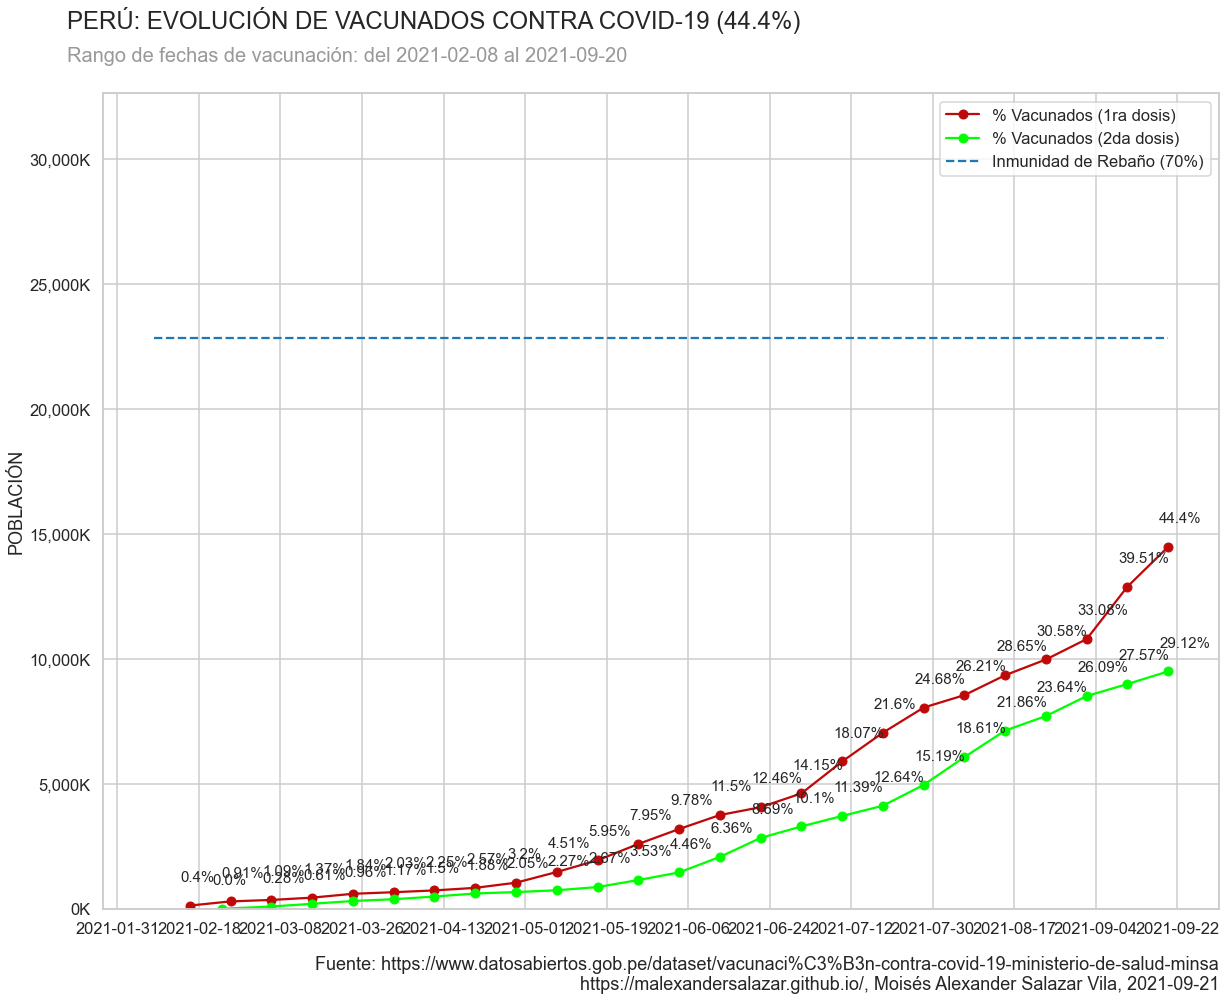

In [7]:
primeradosis_peru_df_len = len(primeradosis_peru_df)
segundadosis_peru_df_len = len(segundadosis_peru_df)

data1_df = primeradosis_peru_df[(primeradosis_peru_df.index - (primeradosis_peru_df_len-1)) % 9 == 0]
data2_df = segundadosis_peru_df[(segundadosis_peru_df.index - (segundadosis_peru_df_len-1)) % 9 == 0]

area = 'PERÚ'

# Creamos la figura, los ejes y agregamos la atribución
plt.clf()

fig, axs = plt.subplots(figsize=(20,15))
plt.figtext(0.1,0.94, area + ': EVOLUCIÓN DE VACUNADOS CONTRA COVID-19 (' + str(round(data1_df['Count'].iat[-1]*100/population[area],2)) + '%)', ha='left', fontsize=24)
plt.figtext(0.1,0.91, 'Rango de fechas de vacunación: del {} al {}'.format(f'{dates_range[0]:%Y-%m-%d}',f'{dates_range[1]:%Y-%m-%d}'), ha='left', fontsize=20, color='#999')
plt.figtext(0.9,0.05, """Fuente: https://www.datosabiertos.gob.pe/dataset/vacunaci%C3%B3n-contra-covid-19-ministerio-de-salud-minsa
https://malexandersalazar.github.io/, Moisés Alexander Salazar Vila, """ + f'{DateTime.now():%Y-%m-%d}', ha='right')

formatter = mdates.DateFormatter("%Y-%m-%d")
locator = mdates.DayLocator(interval=18)

axs.xaxis.set_major_formatter(formatter)
axs.xaxis.set_major_locator(locator)
axs.yaxis.set_major_formatter('{x:,.0f}K')

# Dibujamos linea horizontal para señalar la meta
axs.hlines(population[area]/1000 * 70/100, dates_range[0], dates_range[1], linestyles= 'dashed', label='Inmunidad de Rebaño (70%)')

# Graficamos los datos
axs.plot(data1_df['Date'], data1_df['CountK'], 'o-', color='#bf0909', label='% Vacunados (1ra dosis)')
axs.plot(data2_df['Date'], data2_df['CountK'], 'o-', color='#00ff00', label='% Vacunados (2da dosis)')

# axs.set_xlim(dates_range)
axs.set_ylim([0,population[area]/1000])
axs.set_ylabel('POBLACIÓN')

DD = TimeDelta(days=2)

for i in np.arange(len(data1_df)):
    axs.text(data1_df['Date'].iat[i] - DD, data1_df['CountK'].iat[i] + population[area]/1000 * 3/100, str(round(data1_df['Count'].iat[i]*100/population[area],2)) + '%', fontsize='small')

for i in np.arange(len(data2_df)):
    axs.text(data2_df['Date'].iat[i] - DD, data2_df['CountK'].iat[i] + population[area]/1000 * 3/100, str(round(data2_df['Count'].iat[i]*100/population[area],2)) + '%', fontsize='small')

plt.legend()
plt.show()
plt.close(fig)

In [8]:
def generate_plot(area, primeradosis_df, segundadosis_df, dates_range, show_plot=True, save_plot=True):
    primeradosis_df_len = len(primeradosis_df)
    segundadosis_df_len = len(segundadosis_df)

    data1_df = primeradosis_df[(primeradosis_df.index - (primeradosis_df_len-1)) % 9 == 0]
    data2_df = segundadosis_df[(segundadosis_df.index - (segundadosis_df_len-1)) % 9 == 0]

    # Creamos la figura, los ejes y agregamos la atribución
    plt.clf()

    fig, axs = plt.subplots(figsize=(20,15))
    plt.figtext(0.1,0.94, area + ': EVOLUCIÓN DE VACUNADOS CONTRA COVID-19 (' + str(round(data1_df['Count'].iat[-1]*100/population[area],2)) + '%)', ha='left', fontsize=24)
    plt.figtext(0.1,0.91, 'Rango de fechas de vacunación: del {} al {}'.format(f'{dates_range[0]:%Y-%m-%d}',f'{dates_range[1]:%Y-%m-%d}'), ha='left', fontsize=20, color='#999')
    plt.figtext(0.9,0.05, """Fuente: https://www.datosabiertos.gob.pe/dataset/vacunaci%C3%B3n-contra-covid-19-ministerio-de-salud-minsa
    https://malexandersalazar.github.io/, Moisés Alexander Salazar Vila, """ + f'{DateTime.now():%Y-%m-%d}', ha='right')

    formatter = mdates.DateFormatter("%Y-%m-%d")
    locator = mdates.DayLocator(interval=18)

    axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_locator(locator)
    axs.yaxis.set_major_formatter('{x:,.0f}K')

    # Dibujamos linea horizontal para señalar la meta
    axs.hlines(population[area]/1000 * 70/100, dates_range[0], dates_range[1], linestyles= 'dashed', label='Inmunidad de Rebaño (70%)')

    # Graficamos los datos
    axs.plot(data1_df['Date'], data1_df['CountK'], 'o-', color='#bf0909', label='% Vacunados (1ra dosis)')
    axs.plot(data2_df['Date'], data2_df['CountK'], 'o-', color='#00ff00', label='% Vacunados (2da dosis)')

    # axs.set_xlim(dates_range)
    axs.set_ylim([0,population[area]/1000])
    axs.set_ylabel('POBLACIÓN')

    DD = TimeDelta(days=2)

    for i in np.arange(len(data1_df)):
        axs.text(data1_df['Date'].iat[i] - DD, data1_df['CountK'].iat[i] + population[area]/1000 * 3/100, str(round(data1_df['Count'].iat[i]*100/population[area],2)) + '%', fontsize='small')

    for i in np.arange(len(data2_df)):
        axs.text(data2_df['Date'].iat[i] - DD, data2_df['CountK'].iat[i] + population[area]/1000 * 3/100, str(round(data2_df['Count'].iat[i]*100/population[area],2)) + '%', fontsize='small')

    plt.legend()


    ## 3. Mostramos, guardamos y generamos el Markdown para las imágenes
    sns.despine(left=False, bottom=False)

    if save_plot:
        filename = 'dist/{}_{}.png'.format(f'{DateTime.now():%Y%m%d}', area.replace(' ', '_'))
        plt.savefig("../" + filename, bbox_inches='tight')
        with open("../dist/images.txt", "a", encoding='utf-8') as f:
            f.write('![alt text]({} "{}")\n\n'.format(filename, area))

    if show_plot:
        plt.show()

    plt.close(fig)

In [9]:
# Eliminando archivo generado para el Markdown de las imágenes
if os.path.exists("../dist/images.txt"):
    os.remove("../dist/images.txt")

In [10]:
# Perú
generate_plot('PERÚ', primeradosis_peru_df, segundadosis_peru_df, dates_range, False, True)

In [11]:
# Deparmanetos
departments_ordered = np.sort(df['DEPARTAMENTO'].unique())
for d in departments_ordered:
    
    # PRIMERA DOSIS A NIVEL DEPARTAMENTAL
    dept_df =  df[(df['DOSIS'] == 1) & (df['DEPARTAMENTO'] == d)][['UUID','FECHA_VACUNACION']]
    primera_dosis_gb = dept_df.groupby(['FECHA_VACUNACION']).agg(['count'])

    primera_dosis_data = []
    for item in primera_dosis_gb.iterrows():
        primera_dosis_data.append((DateTime.strptime(str(item[0]),'%Y%m%d'), item[1].get(0)))

    primeradosis_dept_df = pd.DataFrame(primera_dosis_data, columns=('Date','Count'))
    primeradosis_dept_df['CountK'] = primeradosis_dept_df['Count'] / 1000

    for i in np.arange(len(primeradosis_dept_df)-1):
        primeradosis_dept_df.loc[i+1,'Count'] = primeradosis_dept_df.iloc[i+1]['Count'] + primeradosis_dept_df.loc[i,'Count']
        primeradosis_dept_df.loc[i+1,'CountK'] = primeradosis_dept_df.iloc[i+1]['CountK'] + primeradosis_dept_df.loc[i,'CountK']

    # SEGUNDA DOSIS A NIVEL DEPARTAMENTAL
    dept_df =  df[(df['DOSIS'] == 2) & (df['DEPARTAMENTO'] == d)][['UUID','FECHA_VACUNACION']]
    segunda_dosis_gb = dept_df.groupby(['FECHA_VACUNACION']).agg(['count'])

    segunda_dosis_data = []
    for item in segunda_dosis_gb.iterrows():
        segunda_dosis_data.append((DateTime.strptime(str(item[0]),'%Y%m%d'), item[1].get(0)))

    segundadosis_dept_df = pd.DataFrame(segunda_dosis_data, columns=('Date','Count'))
    segundadosis_dept_df['CountK'] = segundadosis_dept_df['Count'] / 1000

    for i in np.arange(len(segundadosis_dept_df)-1):
        segundadosis_dept_df.loc[i+1,'Count'] = segundadosis_dept_df.iloc[i+1]['Count'] + segundadosis_dept_df.loc[i,'Count']
        segundadosis_dept_df.loc[i+1,'CountK'] = segundadosis_dept_df.iloc[i+1]['CountK'] + segundadosis_dept_df.loc[i,'CountK']


    generate_plot(d, primeradosis_dept_df, segundadosis_dept_df, dates_range, False, True)